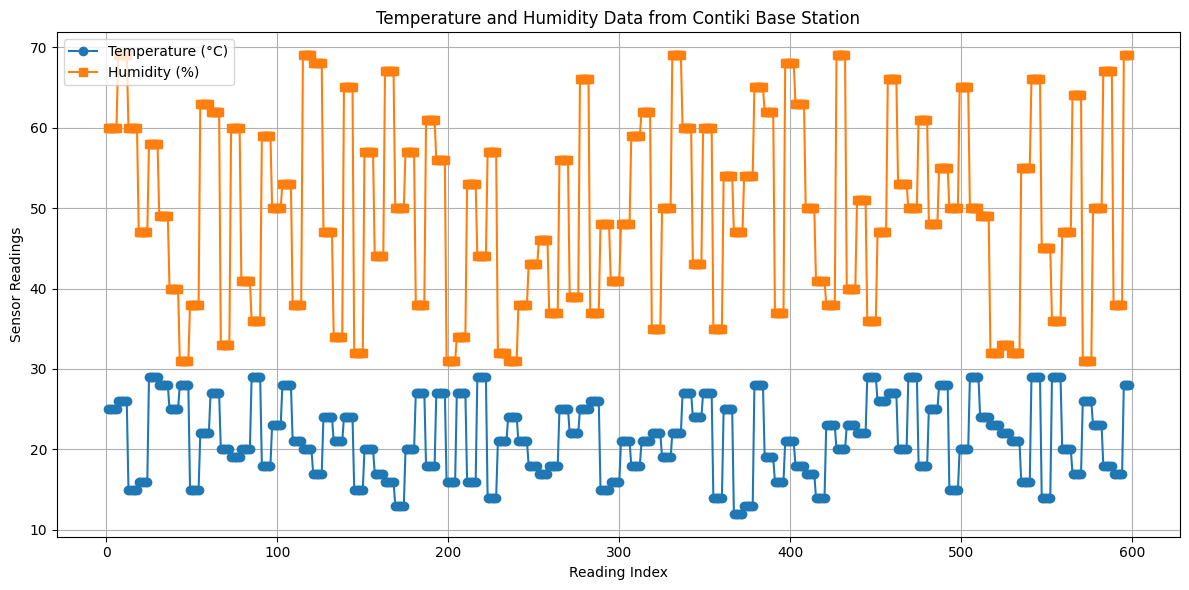

In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

temps = []
hums = []
timestamps = []

with open("/kaggle/input/test8-wsn/test8.txt", "r") as file:
    for line in file:
        if "[INFO: BaseStation]" in line and "Temp:" in line:
            # Extract Temp and Hum values
            match = re.search(r'Temp:\s*(\d+),\s*Hum:\s*(\d+)', line)

            # Extract timestamp from beginning of line (if present)
            time_match = re.match(r'(\d{2}:\d{2}:\d{2}\.\d+)', line)

            if match:
                temp = int(match.group(1))
                hum = int(match.group(2))
                temps.append(temp)
                hums.append(hum)

                if time_match:
                    # Convert to datetime object
                    timestamp = datetime.strptime(time_match.group(1), "%H:%M:%S.%f")
                else:
                    timestamp = len(temps)  # fallback index

                timestamps.append(timestamp)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(timestamps, temps, label="Temperature (°C)", marker='o')
plt.plot(timestamps, hums, label="Humidity (%)", marker='s')

# X-axis formatting
if isinstance(timestamps[0], datetime):
    plt.gcf().autofmt_xdate()
    plt.xlabel("Timestamp (HH:MM:SS)")
else:
    plt.xlabel("Reading Index")

plt.ylabel("Sensor Readings")
plt.title("Temperature and Humidity Data from Contiki Base Station")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


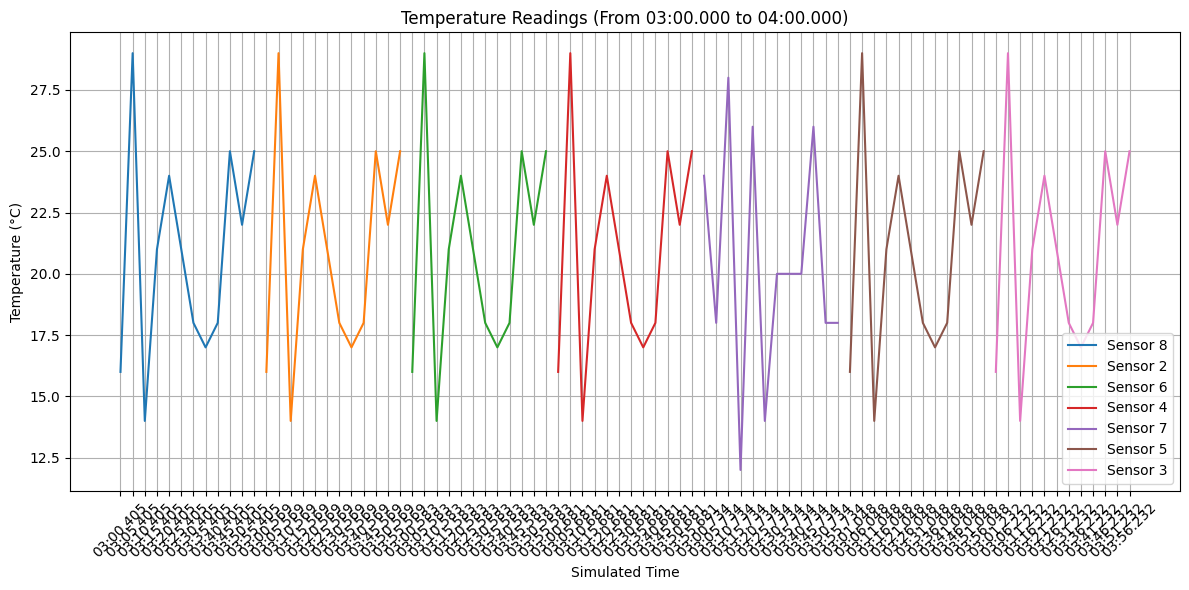

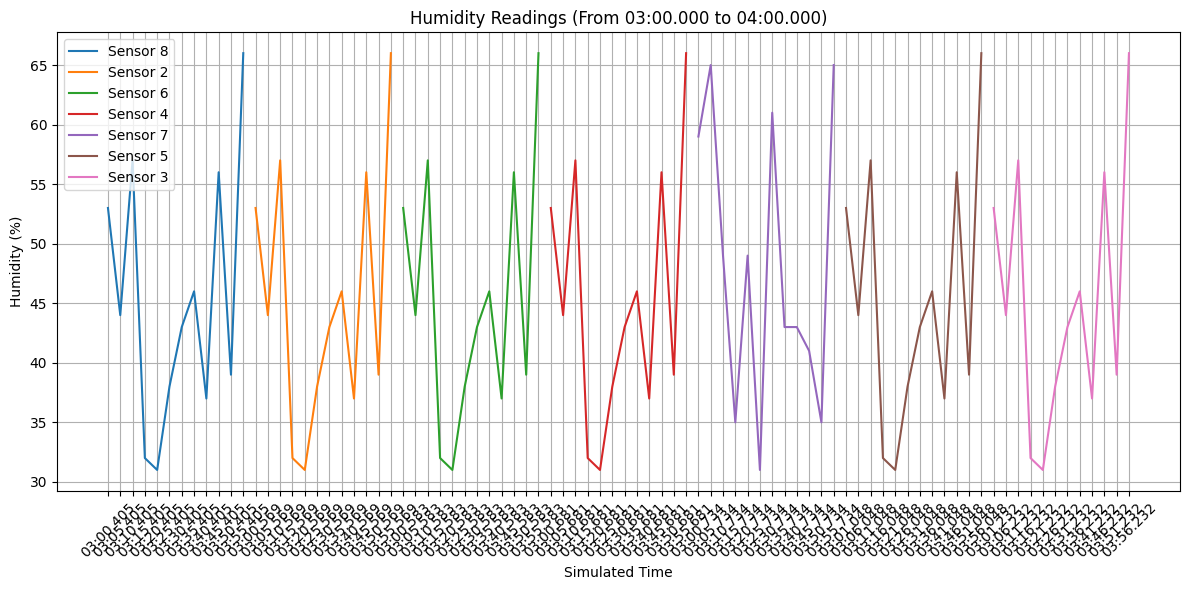

In [3]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# --- Configuration ---
log_file = "/kaggle/input/test8-wsn/test8.txt"
time_format = "%M:%S.%f"

# Define your time interval here
start_time_str = "03:00.000"
end_time_str = "04:00.000"

start_time = datetime.strptime(start_time_str, time_format)
end_time = datetime.strptime(end_time_str, time_format)

# --- Data storage ---
sensor_data = defaultdict(list)

# Regex pattern for parsing
pattern = re.compile(r'(\d+:\d+\.\d+)\s+ID:(\d+)\s+\[INFO: SensorNode\] Sending message: Temp: (\d+), Hum: (\d+)')

# --- Parsing the log ---
with open(log_file, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            time_str = match.group(1)
            time_obj = datetime.strptime(time_str, time_format)
            if start_time <= time_obj <= end_time:
                node_id = int(match.group(2))
                temp = int(match.group(3))
                hum = int(match.group(4))
                sensor_data[node_id].append((time_str, temp, hum))

# --- Plotting helper ---
def plot_sensor_data(data_dict, data_index, ylabel, title):
    plt.figure(figsize=(12, 6))
    for node_id, readings in data_dict.items():
        times = [t for t, _, _ in readings]
        values = [v[data_index] for v in readings]
        plt.plot(times, values, label=f"Sensor {node_id}")
    
    plt.xlabel("Simulated Time")
    plt.ylabel(ylabel)
    plt.title(f"{title} (From {start_time_str} to {end_time_str})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plotting ---
plot_sensor_data(sensor_data, data_index=1, ylabel="Temperature (°C)", title="Temperature Readings")
plot_sensor_data(sensor_data, data_index=2, ylabel="Humidity (%)", title="Humidity Readings")
